<a href="https://colab.research.google.com/github/yadavrahyl2k15/stock_prediction/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/3..Time Series Analysis/BAJFINANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [ ]:
df.set_index('Date')

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.50,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.90,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.10,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.00,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840


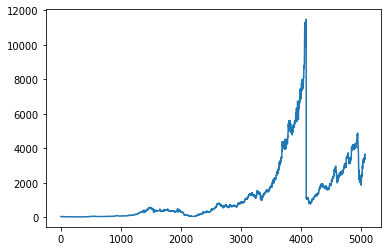

In [ ]:
df['VWAP'].plot()

In [ ]:
df.shape

(5070, 15)

In [ ]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
data=df.copy()

In [ ]:
data.shape

(2291, 15)

In [ ]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
lag_features=['High', 'Low','Turnover','Volume', 'Trades']
window1=3
window2=7

In [ ]:
for features in lag_features:
    data[features + "rollingmean_3"]=data[features].rolling(window=window1).mean()
    data[features + "rollingmean_7"]=data[features].rolling(window=window2).mean()

In [ ]:
for features in lag_features:
    data[features + "rollingstd_3"]=data[features].rolling(window=window1).std()
    data[features + "rollingstd_7"]=data[features].rolling(window=window1).std()

In [ ]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrollingmean_3,Highrollingmean_7,Lowrollingmean_3,Lowrollingmean_7,Turnoverrollingmean_3,Turnoverrollingmean_7,Volumerollingmean_3,Volumerollingmean_7,Tradesrollingmean_3,Tradesrollingmean_7,Highrollingstd_3,Highrollingstd_7,Lowrollingstd_3,Lowrollingstd_7,Turnoverrollingstd_3,Turnoverrollingstd_7,Volumerollingstd_3,Volumerollingstd_7,Tradesrollingstd_3,Tradesrollingstd_7
2779,2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2780,2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2781,2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900,637.733333,NaN,618.666667,NaN,1.274338e+12,NaN,20363.333333,NaN,661.000000,NaN,1.201388,1.201388,2.309401,2.309401,1.685217e+12,1.685217e+12,26980.871860,26980.871860,670.500559,670.500559
2782,2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918,639.233333,NaN,617.116667,NaN,1.242081e+12,NaN,19880.666667,NaN,278.333333,NaN,1.625833,1.625833,4.994080,4.994080,1.710136e+12,1.710136e+12,27352.695339,27352.695339,148.769396,148.769396
2783,2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799,634.250000,NaN,611.783333,NaN,1.306735e+12,NaN,20954.666667,NaN,225.333333,NaN,9.062422,9.062422,8.008797,8.008797,1.652377e+12,1.652377e+12,26391.221653,26391.221653,78.270897,78.270897


In [ ]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrollingmean_3', 'Highrollingmean_7',
       'Lowrollingmean_3', 'Lowrollingmean_7', 'Turnoverrollingmean_3',
       'Turnoverrollingmean_7', 'Volumerollingmean_3', 'Volumerollingmean_7',
       'Tradesrollingmean_3', 'Tradesrollingmean_7', 'Highrollingstd_3',
       'Highrollingstd_7', 'Lowrollingstd_3', 'Lowrollingstd_7',
       'Turnoverrollingstd_3', 'Turnoverrollingstd_7', 'Volumerollingstd_3',
       'Volumerollingstd_7', 'Tradesrollingstd_3', 'Tradesrollingstd_7'],
      dtype='object')

In [ ]:
data.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                   0
Deliverable Volume       0
%Deliverble              0
Highrollingmean_3        2
Highrollingmean_7        6
Lowrollingmean_3         2
Lowrollingmean_7         6
Turnoverrollingmean_3    2
Turnoverrollingmean_7    6
Volumerollingmean_3      2
Volumerollingmean_7      6
Tradesrollingmean_3      2
Tradesrollingmean_7      6
Highrollingstd_3         2
Highrollingstd_7         2
Lowrollingstd_3          2
Lowrollingstd_7          2
Turnoverrollingstd_3     2
Turnoverrollingstd_7     2
Volumerollingstd_3       2
Volumerollingstd_7       2
Tradesrollingstd_3       2
Tradesrollingstd_7       2
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                   0
Deliverable Volume       0
%Deliverble              0
Highrollingmean_3        0
Highrollingmean_7        0
Lowrollingmean_3         0
Lowrollingmean_7         0
Turnoverrollingmean_3    0
Turnoverrollingmean_7    0
Volumerollingmean_3      0
Volumerollingmean_7      0
Tradesrollingmean_3      0
Tradesrollingmean_7      0
Highrollingstd_3         0
Highrollingstd_7         0
Lowrollingstd_3          0
Lowrollingstd_7          0
Turnoverrollingstd_3     0
Turnoverrollingstd_7     0
Volumerollingstd_3       0
Volumerollingstd_7       0
Tradesrollingstd_3       0
Tradesrollingstd_7       0
dtype: int64

In [ ]:
ind_features=['Highrollingmean_3', 'Highrollingmean_7',
       'Lowrollingmean_3', 'Lowrollingmean_7', 'Turnoverrollingmean_3',
       'Turnoverrollingmean_7', 'Volumerollingmean_3', 'Volumerollingmean_7',
       'Tradesrollingmean_3', 'Tradesrollingmean_7', 'Highrollingstd_3',
       'Highrollingstd_7', 'Lowrollingstd_3', 'Lowrollingstd_7',
       'Turnoverrollingstd_3', 'Turnoverrollingstd_7', 'Volumerollingstd_3',
       'Volumerollingstd_7', 'Tradesrollingstd_3', 'Tradesrollingstd_7']

In [ ]:
training_data=data[0:1800]
test_data=data[1800:]

In [ ]:
training_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrollingmean_3,Highrollingmean_7,Lowrollingmean_3,Lowrollingmean_7,Turnoverrollingmean_3,Turnoverrollingmean_7,Volumerollingmean_3,Volumerollingmean_7,Tradesrollingmean_3,Tradesrollingmean_7,Highrollingstd_3,Highrollingstd_7,Lowrollingstd_3,Lowrollingstd_7,Turnoverrollingstd_3,Turnoverrollingstd_7,Volumerollingstd_3,Volumerollingstd_7,Tradesrollingstd_3,Tradesrollingstd_7
2785,2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,1.994715e+12,894.0,18626.0,0.5960,638.650000,638.592857,612.666667,615.050000,1.356553e+12,1.175452e+12,2.136867e+04,1.866314e+04,682.666667,614.142857,12.769789,12.769789,15.011107,15.011107,8.665128e+11,8.665128e+11,13497.047986,13497.047986,354.841279,354.841279
2786,2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,1.958588e+12,1360.0,12656.0,0.4098,646.750000,640.271429,617.516667,615.414286,1.886054e+12,1.393498e+12,2.966667e+04,2.209043e+04,1045.000000,606.142857,1.639360,1.639360,13.030765,13.030765,1.579562e+11,1.579562e+11,2434.970705,2434.970705,272.875429,272.875429
2787,2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,2.479856e+11,250.0,1745.0,0.4383,641.033333,638.692857,621.516667,614.842857,1.400430e+12,1.403765e+12,2.203933e+04,2.226357e+04,834.666667,580.142857,11.434196,11.434196,7.456597,7.456597,9.982094e+11,9.982094e+11,15640.051929,15640.051929,557.373603,557.373603
2788,2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,3.500088e+11,198.0,3717.0,0.6641,635.016667,637.428571,618.166667,614.835714,8.521943e+11,9.945331e+11,1.348767e+04,1.571643e+04,602.666667,589.142857,11.473593,11.473593,2.002707,2.002707,9.595224e+11,9.595224e+11,15088.183102,15088.183102,656.385050,656.385050
2789,2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,7.640851e+11,481.0,9021.0,0.7165,626.600000,634.857143,611.350000,612.942857,4.540265e+11,1.055761e+12,7.389333e+03,1.673700e+04,309.666667,619.571429,3.165833,3.165833,11.643560,11.643560,2.733211e+11,2.733211e+11,4575.812970,4575.812970,150.639747,150.639747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,7.107270e+14,108019.0,608250.0,0.2333,2870.833333,2934.485714,2746.633333,2848.814286,6.015502e+14,4.715141e+14,2.160346e+06,1.649480e+06,106854.666667,87658.142857,88.954937,88.954937,83.341306,83.341306,1.827289e+14,1.827289e+14,696998.737787,696998.737787,2794.744413,2794.744413
4581,2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,4.688484e+14,70749.0,435147.0,0.2518,2807.483333,2906.742857,2688.933333,2812.092857,6.276342e+14,4.974827e+14,2.284096e+06,1.756973e+06,95882.333333,90342.000000,63.129081,63.129081,24.113551,24.113551,1.375623e+14,1.375623e+14,483305.554092,483305.554092,21770.352164,21770.352164
4582,2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,3.094561e+14,46641.0,360465.0,0.3140,2757.983333,2870.957143,2674.300000,2775.750000,4.963438e+14,4.897104e+14,1.827775e+06,1.744707e+06,75136.333333,84844.571429,23.818183,23.818183,8.146778,8.146778,2.020435e+14,2.020435e+14,734609.476628,734609.476628,30923.312263,30923.312263
4583,2018-09-07,BAJFINANCE,EQ,2684.10,2698.40,2751.40,2672.60,2745.00,2744.20,2716.32,1264436,3.434610e+14,56453.0,227156.0,0.1797,2749.233333,2836.300000,2670.666667,2738.978571,3.739218e+14,4.792625e+14,1.380257e+06,1.724972e+06,57947.666667,83329.428571,16.755397,16.755397,2.386071,2.386071,8.394860e+13,8.394860e+13,307128.544854,307128.544854,12123.301421,12123.301421


In [ ]:
test_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrollingmean_3,Highrollingmean_7,Lowrollingmean_3,Lowrollingmean_7,Turnoverrollingmean_3,Turnoverrollingmean_7,Volumerollingmean_3,Volumerollingmean_7,Tradesrollingmean_3,Tradesrollingmean_7,Highrollingstd_3,Highrollingstd_7,Lowrollingstd_3,Lowrollingstd_7,Turnoverrollingstd_3,Turnoverrollingstd_7,Volumerollingstd_3,Volumerollingstd_7,Tradesrollingstd_3,Tradesrollingstd_7
4585,2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.00,2600.75,2619.05,3357660,8.793882e+14,135043.0,728912.0,0.2171,2719.400000,2758.878571,2610.283333,2652.721429,5.465978e+14,5.474503e+14,2.064092e+06,2.027492e+06,89504.000000,86114.285714,44.330125,44.330125,56.544592,56.544592,2.905375e+14,2.905375e+14,1.130645e+06,1.130645e+06,40756.099335,40756.099335
4586,2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.90,2594.00,2577.54,2682340,6.913828e+14,126357.0,586940.0,0.2188,2681.250000,2724.157143,2558.116667,2624.264286,6.625717e+14,5.457439e+14,2.536726e+06,2.051134e+06,112805.333333,88611.142857,51.662632,51.662632,40.110047,40.110047,2.325644e+14,2.325644e+14,9.025933e+05,9.025933e+05,31297.267202,31297.267202
4587,2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.00,2672.20,2651.42,1795131,4.759644e+14,76712.0,424000.0,0.2362,2663.083333,2710.707143,2568.200000,2616.085714,6.822451e+14,5.122064e+14,2.611710e+06,1.935154e+06,112704.000000,84138.714286,23.795710,23.795710,55.315527,55.315527,2.018671e+14,2.018671e+14,7.836553e+05,7.836553e+05,31471.093038,31471.093038
4588,2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.00,2604.60,2613.75,1455320,3.803841e+14,58481.0,264129.0,0.1815,2660.150000,2695.735714,2576.866667,2604.692857,5.159104e+14,4.995687e+14,1.977597e+06,1.896135e+06,87183.333333,82386.142857,23.275363,23.275363,55.950343,55.950343,1.593010e+14,1.593010e+14,6.335337e+05,6.335337e+05,35128.684296,35128.684296
4589,2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.40,2570.40,2597.61,1449290,3.764693e+14,59710.0,200650.0,0.1384,2656.983333,2680.871429,2591.166667,2588.635714,4.109393e+14,5.091420e+14,1.566580e+06,1.939194e+06,64967.666667,84253.142857,28.146507,28.146507,33.719740,33.719740,5.634743e+13,5.634743e+13,1.979536e+05,1.979536e+05,10189.437390,10189.437390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520,3538.333333,3475.992857,3430.350000,3389.157143,2.192348e+15,1.776493e+15,6.229009e+06,5.134360e+06,212607.666667,173809.285714,111.840660,111.840660,69.777271,69.777271,1.315344e+15,1.315344e+15,3.613401e+06,3.613401e+06,125273.490429,125273.490429
5066,2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417,3627.333333,3519.921429,3514.016667,3434.671429,2.708305e+15,1.901918e+15,7.574994e+06,5.419319e+06,254151.666667,181048.285714,100.081633,100.081633,115.027609,115.027609,7.237865e+14,7.237865e+14,1.987080e+06,1.987080e+06,74234.798338,74234.798338
5067,2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840,3678.466667,3552.842857,3579.133333,3467.500000,2.548738e+15,1.912267e+15,7.043513e+06,5.405723e+06,238727.666667,182218.571429,25.064982,25.064982,62.320569,62.320569,9.306171e+14,9.306171e+14,2.641848e+06,2.641848e+06,91269.616085,91269.616085
5068,2020-08-28,BAJFINANCE,EQ,3632.50,3650.00,3688.00,3617.05,3672.05,3670.80,3652.77,4251575,1.553003e+15,137033.0,434147.0,0.1021,3687.800000,3584.700000,3614.816667,3498.364286,1.890774e+15,1.927855e+15,5.176014e+06,5.413219e+06,171133.666667,182354.571429,19.300777,19.300777,17.407781,17.407781,4.837586e+14,4.837586e+14,1.302259e+06,1.

In [ ]:
!pip install pmdarima

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pmdarima import auto_arima


In [ ]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21031.345, Time=6.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21025.014, Time=3.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21024.246, Time=3.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21024.337, Time=4.87 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32716.698, Time=3.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=21026.010, Time=5.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21027.397, Time=5.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=21031.036, Time=5.72 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=21022.901, Time=3.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=21024.649, Time=4.66 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21025.969, Time=4.89 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21022.994, Time=5.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=21029.744, Time=5.18 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 60.627 seconds


In [ ]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast=model.predict(n_periods=len(test_data),exogenous=test_data[ind_features])

In [ ]:
test_data['forecast_ARIMA']=forecast

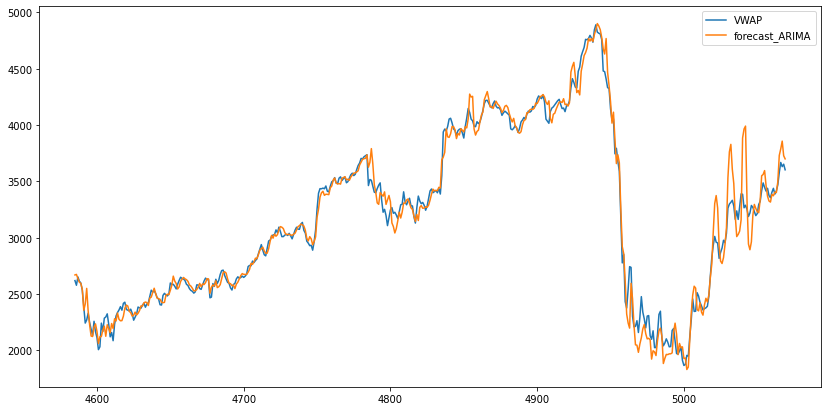

In [ ]:
test_data[['VWAP','forecast_ARIMA']].plot(figsize=(14,7))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['forecast_ARIMA']))

115.4955271978218

In [ ]:
mean_absolute_error(test_data['VWAP'],test_data['forecast_ARIMA'])

72.95724964382299